In [19]:
#Svi importovi
import nltk
import subprocess
import nltk.corpus  
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords, brown
from collections import Counter
from nltk.text import Text 
import os
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('brown')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
path_to_gs = "C:\Program Files\gs\gs9.56.1"
os.environ['PATH']+=os.pathsep + path_to_gs

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Maks\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Maks\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Maks\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Maks\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Maks\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Maks\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [4]:
# Učitavanje knjige
book = open("godfather.txt", "r", encoding = "UTF-8")
book_txt = book.read()

In [8]:
#1. Normalizacija
book_lowercase = book_txt.lower()
print(book_lowercase[0:300])

amerigo bonasera sat in new york criminal court number 3 and waited for justice; vengeance on the men who had so cruelly hurt his daughter, who had tried to dishonor her.

the judge, a formidably heavy-featured man, rolled up the sleeves of his black robe as if to physically chastise the two young m


In [105]:
#2. Tokenizacija
book_tokenized = sent_tokenize(book_lowercase)
print('Broj rečenica: ', len(book_tokenized))

book_tokens = word_tokenize(book_lowercase)
print('Broj tokena: ', len(book_tokens))

Broj rečenica:  4919
Broj tokena:  69630


In [11]:
#3. Pročišćavanje teksta
book_tokens_clean = [word for word in book_tokens if word.isalpha()]
print('Broj tokena nakon pročišćavanja: ', len(book_tokens_clean))

Ukupan broj tokena bez ne-alfanumeričkih znakova:  58135


In [15]:
#4. Stemming
book_stemmed = []
ps = nltk.PorterStemmer()
for word in book_tokens_clean:
    book_stemmed.append(ps.stem(word))
    
print(book_stemmed[0:100])

['amerigo', 'bonasera', 'sat', 'in', 'new', 'york', 'crimin', 'court', 'number', 'and', 'wait', 'for', 'justic', 'vengeanc', 'on', 'the', 'men', 'who', 'had', 'so', 'cruelli', 'hurt', 'hi', 'daughter', 'who', 'had', 'tri', 'to', 'dishonor', 'her', 'the', 'judg', 'a', 'formid', 'man', 'roll', 'up', 'the', 'sleev', 'of', 'hi', 'black', 'robe', 'as', 'if', 'to', 'physic', 'chastis', 'the', 'two', 'young', 'men', 'stand', 'befor', 'the', 'bench', 'hi', 'face', 'wa', 'cold', 'with', 'majest', 'contempt', 'but', 'there', 'wa', 'someth', 'fals', 'in', 'all', 'thi', 'that', 'amerigo', 'bonasera', 'sens', 'but', 'did', 'not', 'yet', 'understand', 'you', 'act', 'like', 'the', 'worst', 'kind', 'of', 'degener', 'the', 'judg', 'said', 'harshli', 'ye', 'ye', 'thought', 'amerigo', 'bonasera', 'anim', 'anim', 'the']


In [21]:
#5. Lematizacija
wnl = nltk.WordNetLemmatizer()
book_lemmatized = []
for word in book_tokens_clean:
    book_lemmatized.append(wnl.lemmatize(word))

print(book_lemmatized[0:50])

['amerigo', 'bonasera', 'sat', 'in', 'new', 'york', 'criminal', 'court', 'number', 'and', 'waited', 'for', 'justice', 'vengeance', 'on', 'the', 'men', 'who', 'had', 'so', 'cruelly', 'hurt', 'his', 'daughter', 'who', 'had', 'tried', 'to', 'dishonor', 'her', 'the', 'judge', 'a', 'formidably', 'man', 'rolled', 'up', 'the', 'sleeve', 'of', 'his', 'black', 'robe', 'a', 'if', 'to', 'physically', 'chastise', 'the', 'two']


In [27]:
#6. Uklanjanje stop riječi
book_removed_stop_words = [token for token in book_lemmatized if not token in stopwords.words("english")]
print(book_removed_stop_words[0:50])

['amerigo', 'bonasera', 'sat', 'new', 'york', 'criminal', 'court', 'number', 'waited', 'justice', 'vengeance', 'men', 'cruelly', 'hurt', 'daughter', 'tried', 'dishonor', 'judge', 'formidably', 'man', 'rolled', 'sleeve', 'black', 'robe', 'physically', 'chastise', 'two', 'young', 'men', 'standing', 'bench', 'face', 'wa', 'cold', 'majestic', 'contempt', 'wa', 'something', 'false', 'amerigo', 'bonasera', 'sensed', 'yet', 'understand', 'acted', 'like', 'worst', 'kind', 'degenerate', 'judge']


[('wa', 913), ('said', 486), ('hagen', 325), ('would', 290), ('michael', 286), ('corleone', 280), ('sonny', 280), ('man', 249), ('sollozzo', 210), ('family', 192)]


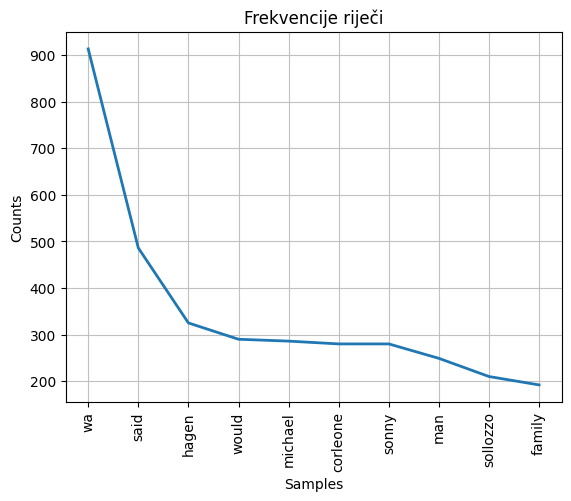

<AxesSubplot:title={'center':'Frekvencije riječi'}, xlabel='Samples', ylabel='Counts'>

In [35]:
#7. Frekvencije riječi

word_count = Counter(book_removed_stop_words)
print(word_count.most_common(10))

fd = nltk.FreqDist(book_removed_stop_words)
frequency = fd.most_common(10)
fd.plot(10,title='Frekvencije riječi')

In [97]:
#8. Concordance za najfrekventnije riječi

frequency2 = []

for token in frequency:
    frequency2.append(token[0])

tokens1 = nltk.word_tokenize(book_txt)
text1 = nltk.Text(book_removed_stop_words)

for token in frequency2:
    text1.concordance(token)
    print("\n")

Displaying 25 of 913 matches:
ise two young men standing bench face wa cold majestic contempt wa something f
 bench face wa cold majestic contempt wa something false amerigo bonasera sens
onasera face beautiful young daughter wa still hospital broken jaw wired toget
te linen pocket handkerchief held lip wa standing two young men strode freely 
ican dress glanced shamefaced yet eye wa odd triumphant defiance control bonas
oved quickly block row bonasera stood wa necessary year america amerigo bonase
os angeles hotel suite johnny fontane wa jealously drunk ordinary husband spra
g mouth crystal bucket ice cube water wa four morning wa spinning drunken fant
bucket ice cube water wa four morning wa spinning drunken fantasy murdering tr
g trampy wife got home ever come home wa late call first wife ask kid felt fun
 kid felt funny calling friend career wa plunging downhill time would godfathe
 door kept drinking walked room stood wa beautiful angelic face soulful violet
e perfectly formed bod

In [98]:
#9. Kolokacije

text1 = nltk.Text(tokens1)
text1.collocation_list()

[('old', 'man'),
 ('Johnny', 'Fontane'),
 ('New', 'York'),
 ('Paulie', 'Gatto'),
 ('Luca', 'Brasi'),
 ('Long', 'Beach'),
 ('Hagen', 'said'),
 ('Tom', 'Hagen'),
 ('Amerigo', 'Bonasera'),
 ('police', 'captain'),
 ('Sonny', 'said'),
 ('Michael', 'said'),
 ('Genco', 'Abbandando'),
 ('thousand', 'dollars'),
 ('Corleone', 'Family'),
 ('Kay', 'Adams'),
 ('Jack', 'Woltz'),
 ('Bruno', 'Tattaglia'),
 ("n't", 'want'),
 ('Sonny', 'Corleone')]

In [80]:
#10. Leksički diverzitet

def lexical_diversity(text):
    return len(set(text)) / len(text)

print(lexical_diversity(book_removed_stop_words))

0.1650580784991026


In [99]:
#11: Primjena Brown korpusa

categories = brown.categories()

for category in categories:
    print(f"Kategorija {category}: ")
    genre_text = brown.words(categories = category)
    freq_dist = nltk.FreqDist(genre_text)
    for word in book_removed_stop_words[0:100]:
        print(word + ':', freq_dist[word], end=', ')
    print('\n')

Kategorija adventure: 
amerigo: 0, bonasera: 0, sat: 23, new: 22, york: 0, criminal: 1, court: 0, number: 4, waited: 12, justice: 1, vengeance: 0, men: 81, cruelly: 1, hurt: 11, daughter: 1, tried: 16, dishonor: 1, judge: 2, formidably: 0, man: 165, rolled: 9, sleeve: 6, black: 26, robe: 1, physically: 0, chastise: 0, two: 80, young: 24, men: 81, standing: 12, bench: 0, face: 74, wa: 0, cold: 14, majestic: 0, contempt: 0, wa: 0, something: 50, false: 1, amerigo: 0, bonasera: 0, sensed: 4, yet: 21, understand: 13, acted: 1, like: 136, worst: 3, kind: 19, degenerate: 0, judge: 2, said: 287, harshly: 3, yes: 5, yes: 5, thought: 62, amerigo: 0, bonasera: 0, animal: 4, animal: 4, two: 80, young: 24, men: 81, glossy: 0, hair: 37, crew: 4, cut: 10, scrubbed: 1, face: 74, composed: 0, humble: 0, contrition: 0, bowed: 0, head: 71, submission: 0, judge: 2, went: 60, acted: 1, like: 136, wild: 7, beast: 1, jungle: 16, fortunate: 0, sexually: 0, molest: 0, poor: 5, girl: 53, put: 23, behind: 48, b

In [106]:
#12. Tagiranje riječi i lingvističko stablo

list1 = book_tokenized[200]
tokens1 = word_tokenize(list1)
print(tokens1)
list_tokens1 = nltk.pos_tag(word_tokenize(list1))
list_tokens1

['finally', 'her', 'attention', 'was', 'caught', 'by', 'a', 'small', 'group', 'of', 'men', 'gathered', 'around', 'a', 'wooden', 'barrel', 'of', 'homemade', 'wine', '.']


[('finally', 'RB'),
 ('her', 'PRP$'),
 ('attention', 'NN'),
 ('was', 'VBD'),
 ('caught', 'VBN'),
 ('by', 'IN'),
 ('a', 'DT'),
 ('small', 'JJ'),
 ('group', 'NN'),
 ('of', 'IN'),
 ('men', 'NNS'),
 ('gathered', 'VBN'),
 ('around', 'IN'),
 ('a', 'DT'),
 ('wooden', 'JJ'),
 ('barrel', 'NN'),
 ('of', 'IN'),
 ('homemade', 'JJ'),
 ('wine', 'NN'),
 ('.', '.')]

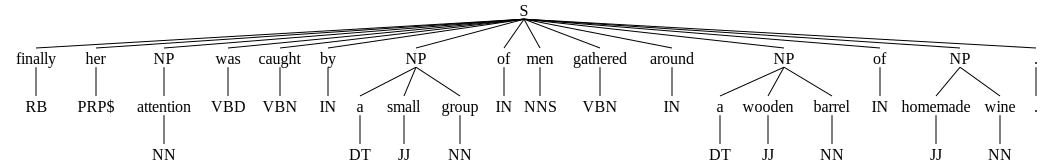

In [107]:
grammar_np = r"NP: {<DT>?<JJ>*<NN>}" 
parser1 = nltk.RegexpParser(grammar_np)
result1 = parser1.parse(sent_tokens1)
result1

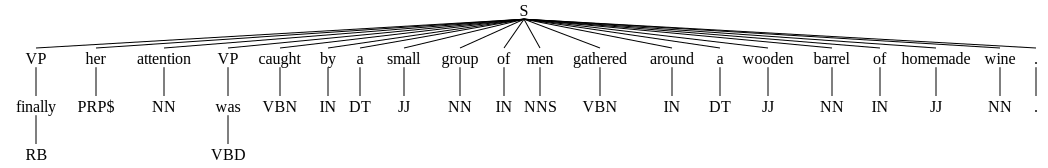

In [108]:
grammar_vp = r"VP: {<PRP>?<VB|VBD|VBZ|VBG>*<RB|RBR>?}"
parser2 = nltk.RegexpParser(grammar_vp)
list2 = list1
list_tokens2 = nltk.pos_tag(word_tokenize(list2))
list_tokens2
result2 = parser2.parse(list_tokens2)
result2